In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
import seaborn as sns
import os
import cv2

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report
from sklearn.model_selection import train_test_split

In [28]:
# Define os caminhos para os dados de treino e teste
source_path_train = './Training/'
source_path_test ='./Testing/'

# Obtém a lista de categorias (classes) do diretório de treino
categories = os.listdir(source_path_train)

# Exibe as classes
for category in categories:
    os.listdir(os.path.join(source_path_train,category))
    
# Define um dicionário para mapear as classes para rótulos numéricos
classes = {'glioma_tumor':0, 'meningioma_tumor':1, 'no_tumor':2, 'pituitary_tumor':3 }
classes

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

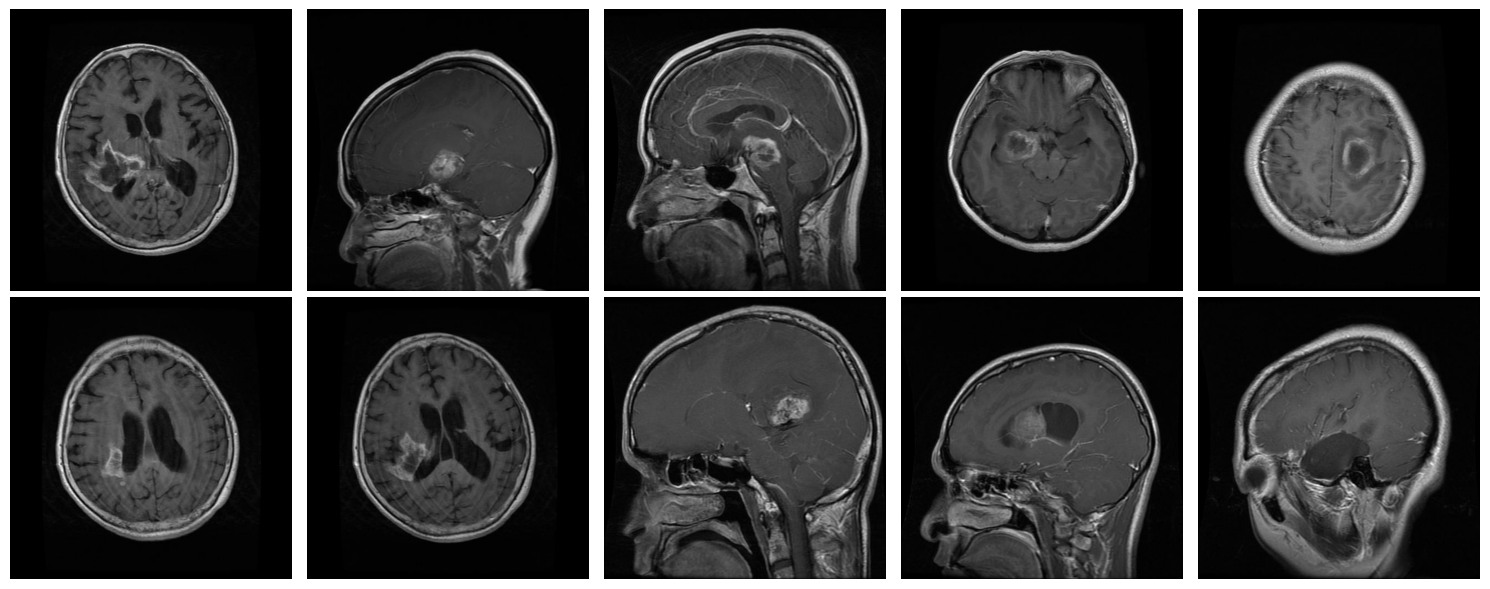

In [29]:
# Visualiza imagens aleatórias de uma classe específica (glioma_tumor)
path_image= './Training/glioma_tumor/'
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
random_indices = random.sample(range(1, 101), 10)

for i, idx in enumerate(random_indices, 1):
    file_path = os.path.join(path_image, f'gg ({idx}).jpg')
    image = Image.open(file_path)
    subplot_row = (i - 1) // 5
    subplot_col = (i - 1) % 5
    axes[subplot_row, subplot_col].imshow(image)
    axes[subplot_row, subplot_col].axis('off')  
plt.tight_layout()   
plt.show()

In [30]:
classes = {'glioma_tumor':0, 'meningioma_tumor':1, 'no_tumor':2, 'pituitary_tumor':3 }

In [31]:
X = []
Y = []

# Carrega imagens do conjunto de treino
for cls in classes:
    pth = source_path_train + '//' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth + '//' + j, 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

# Carrega imagens do conjunto de teste
for cls in classes:
    pth = source_path_test + '//' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth + '//' + j, 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

# Converte os dados para arrays numpy
X = np.array(X)
Y = np.array(Y)

# Exibe a contagem de cada classe no conjunto de dados
pd.Series(Y).value_counts()

1    937
0    926
3    901
2    500
Name: count, dtype: int64

In [32]:
# Reformula os dados
X_updated = X.reshape(len(X), -1)
X_updated.shape

(3264, 40000)

In [33]:
# Divide os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_updated, Y, random_state = 10, test_size = 0.20)

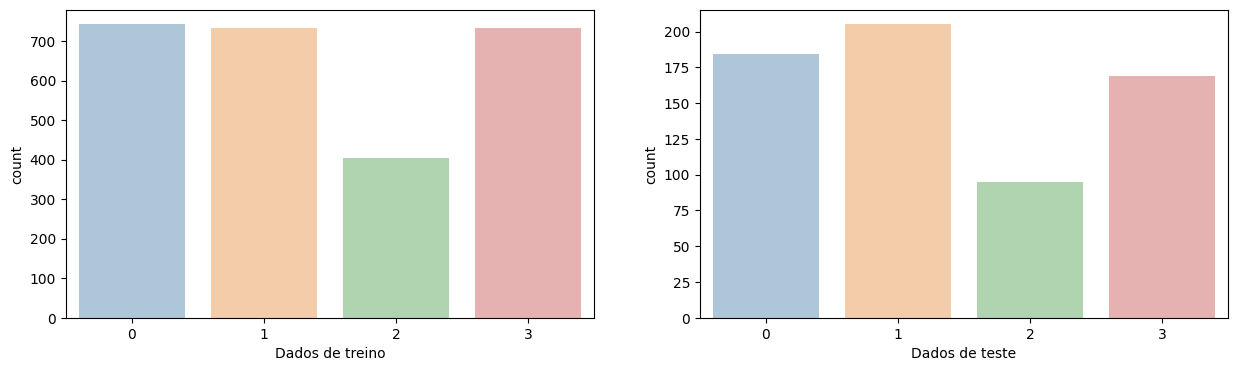

In [34]:
# Visualiza a distribuição das classes nos conjuntos de treino e teste
plt.figure(figsize = (15,4));
lis = ['Dados de treino', 'Dados de teste']
for i,j in enumerate([y_train, y_test]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j,alpha=0.4 );
    plt.xlabel(lis[i])

In [35]:
# Reformula os dados de treino e teste
X_train_updated = X_train.reshape(len(X_train), -1)
X_test_updated = X_test.reshape(len(X_test), -1)
X_train_updated.shape, X_test_updated.shape

((2611, 40000), (653, 40000))

In [36]:
# Normaliza os valores dos pixels para o intervalo [0, 1]
print(X_train_updated.max(), X_train_updated.min())
print(X_test_updated.max(), X_test_updated.min())
X_train_updated = X_train_updated/255
X_test_updated = X_test_updated/255
print(X_train_updated.max(), X_train_updated.min())
print(X_test_updated.max(), X_test_updated.min())

255 0
255 0
255 0
255 0


In [37]:
names = []
accuracies = []
finalResults = []

## algoritmo KNN 

In [38]:
# Treina um classificador K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=3) # vizinhos
knn.fit(X_train_updated, y_train)
y_pred =knn.predict(X_test_updated)

# Avalia o desempenho do classificador
accuracy = accuracy_score( y_test,y_pred)
CM_knn = confusion_matrix(y_test, y_pred)

# Exibe os resultados
print("Accuracy : ", accuracy * 100, '%')
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )
name ='KNN'
names.append(name)
accuracies.append(accuracy)
finalResults.append((name,accuracy))

Accuracy :  80.55130168453293 %
Classification Report is :                precision    recall  f1-score   support

           0       0.74      0.87      0.80       184
           1       0.88      0.65      0.75       205
           2       0.73      0.72      0.72        95
           3       0.85      0.98      0.91       169

    accuracy                           0.81       653
   macro avg       0.80      0.80      0.80       653
weighted avg       0.81      0.81      0.80       653



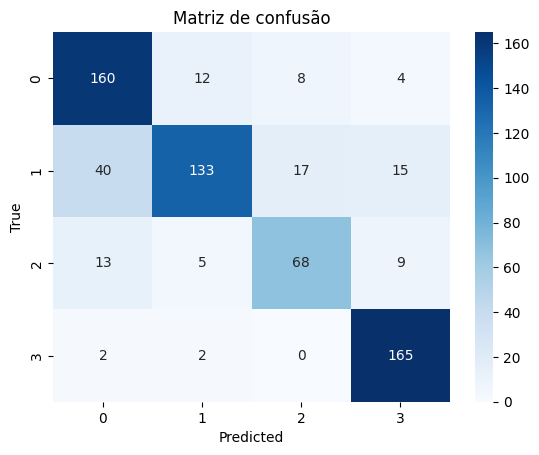

In [39]:
# Visualiza a matriz de confusão
sns.heatmap(CM_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusão")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()